In [13]:
import pandas as pd
import sqlalchemy
from binance.client import Client
from binance import BinanceSocketManager
import matplotlib.pyplot as plt
import time
from datetime import datetime
import numpy as np

In [14]:
import sys
sys.path.append('C:\\Users\\Titouan\\Documents\\GitHub\\binance\\python_scripts')
import api_access as api 

In [15]:
PATH_DATA = '../data/'
PATH_SCRIPTS = '../'
API_FILE_NAME = 'api_access.json'
    
api_dic = api.get_api_code(API_FILE_NAME,PATH_DATA)

In [16]:
client = Client(api_dic['api_key'],api_dic['api_secret'])

In [17]:
bsm = BinanceSocketManager(client)
socket = bsm.trade_socket('LTCBTC')

In [18]:
#Creation BDD SQL
engine = sqlalchemy.create_engine('sqlite:///Binance_Stream.db')

In [19]:
def reformat_tickers(df):
    for col in df.columns:
            
        if "time" in col :
            df[col] = pd.to_datetime(df[col], unit = 'ms')
        else :
            df[col] = df[col].astype(float)

In [26]:
columns = [
    'open_time', 'open', 'high', 'low', 'close', 'volume',
    'close_time', 'quote_asset_volume', 'number_of_trades',
    'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume',
    'ignore'
]

In [28]:
for i in range(1):
    
    candles = client.get_historical_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_1MINUTE,start_str  = "1 Mar, 2023", end_str = "1 Apr, 2023")
    candle_df = pd.DataFrame(candles,columns = columns)
    candle_df
    reformat_tickers(candle_df)
    candle_df.to_sql('BTCUSDT',engine,if_exists = 'append',index = False)

In [40]:
tickers = client.get_ticker()

In [45]:
def reformat_tickers(df):
    for col in df.columns:
        if col not in ["symbol","openTime","closeTime","firstId","lastId","count"] :
            df[col] = df[col].astype(float)
        elif "Time" in col :
            df[col] = pd.to_datetime(df[col], unit = 'ms')
    return df

In [46]:
all_crypto = reformat_tickers(pd.DataFrame(tickers))

In [47]:
all_crypto

,symbol,priceChange,priceChangePercent,weightedAvgPrice,prevClosePrice,lastPrice,lastQty,bidPrice,bidQty,askPrice,...,openPrice,highPrice,lowPrice,volume,quoteVolume,openTime,closeTime,firstId,lastId,count
0,ETHBTC,0.001871,2.903,0.065524,0.064457,0.066328,0.0117,0.066328,23.3402,0.066329,...,0.064457,0.066556,0.064401,9.578173e+04,6.276022e+03,2023-04-03 20:44:03.881,2023-04-04 20:44:03.881,411305093,411476103,171011
1,LTCBTC,0.000016,0.488,0.003310,0.003279,0.003295,1.0930,0.003294,38.2670,0.003296,...,0.003279,0.003358,0.003277,6.492330e+04,2.148866e+02,2023-04-03 20:44:01.797,2023-04-04 20:44:01.797,90049790,90071531,21742
2,BNBBTC,0.000089,0.815,0.011043,0.010925,0.011014,0.1670,0.011014,7.5540,0.011015,...,0.010925,0.011164,0.010887,3.672696e+04,4.055820e+02,2023-04-03 20:44:01.809,2023-04-04 20:44:01.809,219235036,219296285,61250
3,NEOBTC,0.000001,0.235,0.000427,0.000426,0.000427,40.0900,0.000426,1617.1700,0.000428,...,0.000426,0.000433,0.000421,2.001942e+04,8.543111e+00,2023-04-03 20:44:00.232,2023-04-04 20:44:00.232,44740563,44742477,1915
4,QTUMETH,-0.000017,-1.003,0.001676,0.001704,0.001678,7.9000,0.001675,69.2000,0.001683,...,0.001695,0.001726,0.001659,2.227100e+03,3.733152e+00,2023-04-03 20:43:36.000,2023-04-04 20:43:36.000,5383836,5383907,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,SOLTUSD,0.460000,2.244,20.673310,20.620000,20.960000,15.0000,21.020000,44.2000,21.070000,...,20.500000,21.130000,20.140000,1.641560e+03,3.393648e+04,2023-04-03 20:44:04.680,2023-04-04 20:44:04.680,989,1096,108
2184,SSVTUSD,1.920000,5.371,37.359738,35.890000,37.670000,2.7480,37.930000,36.0490,38.050000,...,35.750000,38.830000,35.660000,1.494566e+03,5.583659e+04,2023-04-03 20:44:01.577,2023-04-04 20:44:01.577,966,1326,361
2185,RDNTBTC,0.000001,10.097,0.000012,0.000011,0.000012,2668.0000,0.000012,8949.0000,0.000012,...,0.000011,0.000013,0.000011,3.459278e+06,4.317665e+01,2023-04-03 20:44:03.619,2023-04-04 20:44:03.619,28408,32868,4461
2186,RDNTUSDT,0.038700,12.348,0.348756,0.313600,0.352100,1158.0000,0.351600,710.0000,0.352000,...,0.313400,0.370000,0.307600,6.211275e+07,2.166219e+07,2023-04-03 20:44:03.613,2023-04-04 20:44:03.613,389044,443783,54740


In [55]:
pd.DataFrame(tickers).sort_values('volume')

,symbol,priceChange,priceChangePercent,weightedAvgPrice,prevClosePrice,lastPrice,lastQty,bidPrice,bidQty,askPrice,...,openPrice,highPrice,lowPrice,volume,quoteVolume,openTime,closeTime,firstId,lastId,count
1909,BTTCUSDC,0.00000000,0.000,0.00000000,0.00000078,0.00000000,0.0,0.00000000,0.0,0.00000000,...,0.00000000,0.00000000,0.00000000,0.0,0.00000000,1679540610876,1679627010876,-1,-1,0
1426,SHIBRUB,0.00000000,0.000,0.00000000,0.00057730,0.00000000,0.00,0.00000000,0.00,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00,0.00000000,1679540610876,1679627010876,-1,-1,0
2034,SHIBGBP,0.00000000,0.000,0.00000000,0.00000696,0.00000000,0.00,0.00000000,0.00,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00,0.00000000,1679540610876,1679627010876,-1,-1,0
1728,SHIBUAH,0.00000000,0.000,0.00000000,0.00079300,0.00000000,0.00,0.00000000,0.00,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00,0.00000000,1679540610876,1679627010876,-1,-1,0
1093,AAVEBKRW,0.00000000,0.000,0.00000000,164167.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1679540610876,1679627010876,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,ALGOTRY,0.13700000,3.287,4.23774724,4.16800000,4.30500000,3.80000000,4.30200000,2405.80000000,4.30500000,...,4.16800000,4.32100000,4.10100000,991878.20000000,4203329.10580000,1680554514860,1680640914860,957778,959934,2157
200,ICXBTC,0.00000274,24.886,0.00001308,0.00001101,0.00001375,50.00000000,0.00001375,515.00000000,0.00001378,...,0.00001101,0.00001461,0.00001064,9932124.00000000,129.93342218,1680554633929,1680641033929,32585137,32605612,20476
851,ETHDOWNUSDT,-0.02630000,-9.977,0.24660838,0.26400000,0.23730000,1822.51000000,0.23710000,342.64000000,0.23740000,...,0.26360000,0.27120000,0.23190000,9947562.54000000,2453152.24100100,1680554643594,1680641043594,28694830,28736844,42015
1158,STRAXUSDT,0.05800000,10.302,0.62454074,0.56200000,0.62100000,120.00000000,0.62000000,168.30000000,0.62100000,...,0.56300000,0.68300000,0.55500000,9966560.80000000,6224523.29170000,1680554645031,1680641045031,12432791,12461540,28750


In [60]:
usdt_crypto = all_crypto[all_crypto.apply(lambda x : "USDT" in x.symbol,axis =1)]

In [65]:
usdt_crypto = usdt_crypto.sort_values("lastPrice",ascending = False)

In [81]:
concat_usdt = pd.concat([usdt_crypto.symbol.str.split('USDT',expand = True).replace("","USDT").set_axis(["start","end"],axis = 1),usdt_crypto],axis = 1)

In [84]:
start_usdt = concat_usdt[concat_usdt['start'] == "USDT"]
end_usdt = concat_usdt[concat_usdt['end'] == "USDT"]

In [97]:
top_price_crypto = list(end_usdt.sort_values("lastPrice",ascending = False).iloc[:20].symbol.values)

In [101]:
top_vol_crypto = list(end_usdt.sort_values("volume",ascending = False).iloc[:20].symbol.values)

In [126]:
engine = sqlalchemy.create_engine('sqlite:///new.db')

In [119]:
import time

In [127]:
def reformat_tickers_pair(df):
    for col in df.columns:
            
        if "time" in col :
            df[col] = pd.to_datetime(df[col], unit = 'ms')
        else :
            df[col] = df[col].astype(float)

In [132]:
for tick in top_price_crypto:
    print(f"Crypto : {tick}")
    start = time.time()
    
    candles = client.get_historical_klines(symbol= tick, interval=Client.KLINE_INTERVAL_1MINUTE,start_str  = "1 Jan, 2017", end_str = "1 Apr, 2023")
    candle_df = pd.DataFrame(candles,columns = columns)
    candle_df
    reformat_tickers_pair(candle_df)

    candle_df.to_sql(tick,engine,if_exists = 'append',index = False)
    end  = time.time()

    min_ = (end - start)//60
    second = (end - start)%60

    print(f"End in {min_:.0f} min and {second:.2f} seconds")


Crypto : BTCUSDT
End in 66 min and 30.54 seconds
Crypto : YFIUSDT
End in 31 min and 2.04 seconds
Crypto : PAXGUSDT
End in 29 min and 54.58 seconds
Crypto : ETHUSDT
End in 66 min and 4.01 seconds
Crypto : BETHUSDT
End in 0 min and 56.06 seconds
Crypto : YFIIUSDT
End in 29 min and 35.76 seconds
Crypto : MKRUSDT
End in 30 min and 12.87 seconds
Crypto : BIFIUSDT
End in 10 min and 56.46 seconds
Crypto : BNBUSDT
End in 61 min and 36.35 seconds
Crypto : AUTOUSDT
End in 22 min and 25.78 seconds
Crypto : XMRUSDT
End in 45 min and 38.27 seconds
Crypto : BCHUSDT
End in 37 min and 49.86 seconds
Crypto : QNTUSDT
End in 18 min and 52.41 seconds
Crypto : GNOUSDT
End in 17 min and 21.78 seconds
Crypto : LTCUSDT
End in 62 min and 26.95 seconds
Crypto : QUICKUSDT
End in 18 min and 28.31 seconds
Crypto : KP3RUSDT
End in 15 min and 55.68 seconds
Crypto : AAVEUSDT
End in 28 min and 20.67 seconds
Crypto : GMXUSDT
End in 5 min and 34.79 seconds
Crypto : ILVUSDT
End in 17 min and 9.42 seconds


In [133]:
test = pd.read_sql('BCHUSDT',engine)


In [138]:
test2 = pd.read_sql('BTCUSDT',engine)
test3 = pd.read_sql('LTCUSDT',engine)

In [136]:
import matplotlib.pyplot as plt

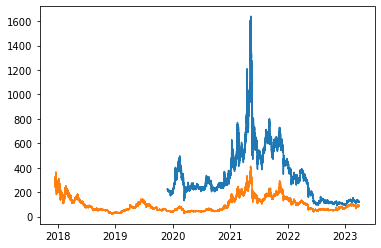

In [140]:
plt.plot(test.open_time, test.close)
#plt.plot(test2.open_time, test2.close)
plt.plot(test3.open_time, test3.close)

In [143]:
dic_df ={}
for ticker in top_price_crypto : 
    dic_df[ticker] = pd.read_sql(ticker,engine)

,Ticker,Start,End,Length


In [165]:
sum_up_df = pd.DataFrame(columns = ["Ticker","Start","End",'Length'])

for ticker in dic_df.keys():
    start = dic_df[ticker]['open_time'].iloc[0]
    end = dic_df[ticker]['open_time'].iloc[-1]
    length = len(dic_df[ticker])

    line = pd.DataFrame([[ticker,start,end,length]],columns = sum_up_df.columns)
    sum_up_df = pd.concat([sum_up_df,line],axis = 0)

In [168]:
sum_up_df.to_excel('../data/sum_up_data.xlsx')